In [ ]:
# installs
! pip install spacy
! pip install nltk
! pip install scikit-plot
! pip install umap-learn
! pip install afinn
! pip install textblob
! pip install seaborn
! pip install gensim
! pip install langdetect


In [ ]:
import datetime 
from dateutil.relativedelta import *
import os
import re 
import string
import nltk
import pandas as pd 
import numpy as np
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words=stopwords.words('english')
import nltk
nltk.download('wordnet')

import matplotlib.pyplot as plt 

from collections import OrderedDict
import langdetect 
from langdetect import DetectorFactory , detect_langs # for dermining language  
DetectorFactory.seed = 0

#from google_trans_new import google_translator  # translating words
#translator = google_translator()  

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import LatentDirichletAllocation


from wordcloud import WordCloud 
%matplotlib inline

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# Data Import

In [ ]:
csv = pd.read_csv("https://raw.githubusercontent.com/kennyzhou9/Capstone-Project-Team19/main/Groupon_SamsClub.csv")
sams = pd.DataFrame(csv)
sams.head()


,name,text,rating,review_count,top_reviewer,helpful_reviewer,date_published,date_scraped
0,Camillia,I have not received my card yet,2,1,0,0,04/07/2021,04/07/2021 00:50:33
1,Carla,This is such a good deal on a membership. Even...,5,1,0,0,04/07/2021,04/07/2021 00:50:33
2,Robert,The Sam's Membership process via discount prov...,5,1,0,0,04/07/2021,04/07/2021 00:50:33
3,Regina,Good deals,5,7,1,1,04/07/2021,04/07/2021 00:50:33
4,La,Just left Sam’s WITHOUT my membership card! Wo...,1,1,0,0,04/07/2021,04/07/2021 00:50:33


In [ ]:
sams = sams.astype('string').fillna('')

In [ ]:
from tqdm import tqdm
from langdetect import detect
from langdetect import DetectorFactory

In [ ]:
DetectorFactory.seed = 0

In [ ]:
languages = []


for ii in tqdm(range(0,len(sams))):
    # split by space into list, take the first x intex, join with space
    text = sams.iloc[ii]['text'].split(" ")
    
    lang = "en"
    try:
        if len(text) > 50:
            lang = detect(" ".join(text[:50]))
        elif len(text) > 0:
            lang = detect(" ".join(text[:len(text)]))
    
    except Exception as e:
        all_words = set(text)
        try:
            lang = detect(" ".join(all_words))
        
        except Exception as e:
           lang = "unknown"
                
            
           
    
      
    languages.append(lang)

Streaming output truncated to the last 5000 lines.

 36%|███▌      | 10174/28540 [01:33<03:10, 96.55it/s]


 36%|███▌      | 10185/28540 [01:33<03:04, 99.36it/s]


 36%|███▌      | 10198/28540 [01:33<02:52, 106.21it/s]


 36%|███▌      | 10210/28540 [01:33<02:49, 108.03it/s]


 36%|███▌      | 10222/28540 [01:33<02:50, 107.23it/s]


 36%|███▌      | 10233/28540 [01:33<03:00, 101.62it/s]


 36%|███▌      | 10244/28540 [01:33<03:01, 100.61it/s]


 36%|███▌      | 10255/28540 [01:33<03:05, 98.72it/s] 


 36%|███▌      | 10265/28540 [01:33<03:10, 95.68it/s]


 36%|███▌      | 10275/28540 [01:34<03:13, 94.31it/s]


 36%|███▌      | 10286/28540 [01:34<03:07, 97.38it/s]


 36%|███▌      | 10296/28540 [01:34<03:18, 92.10it/s]


 36%|███▌      | 10308/28540 [01:34<03:05, 98.38it/s]


 36%|███▌      | 10320/28540 [01:34<02:56, 103.02it/s]


 36%|███▌      | 10331/28540 [01:34<02:59, 101.58it/s]


 36%|███▌      | 10344/28540 [01:34<02:48, 108.27it/s]


 36%|███▋      | 10356/28540 [01:34<02:43, 

# Tokenization

In [ ]:
# Package import
import string
import spacy.cli 
from spacy.lang.en import English
spacy.cli.download("en_core_web_sm")
nlp = spacy.load('en_core_web_sm')
import en_core_web_sm
from  spacy.lang.en.stop_words import STOP_WORDS
parser = English()
punctuations = string.punctuation

✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')


In [ ]:
sams

,name,text,rating,review_count,top_reviewer,helpful_reviewer,date_published,date_scraped
0,Camillia,I have not received my card yet,2,1,0,0,04/07/2021,04/07/2021 00:50:33
1,Carla,This is such a good deal on a membership. Even...,5,1,0,0,04/07/2021,04/07/2021 00:50:33
2,Robert,The Sam's Membership process via discount prov...,5,1,0,0,04/07/2021,04/07/2021 00:50:33
3,Regina,Good deals,5,7,1,1,04/07/2021,04/07/2021 00:50:33
4,La,Just left Sam’s WITHOUT my membership card! Wo...,1,1,0,0,04/07/2021,04/07/2021 00:50:33
...,...,...,...,...,...,...,...,...
28535,Susan,Love this store! Always find great deals at SA...,5,0,0,1,11/10/2013,04/07/2021 11:11:22
28536,Michael,The deal was great. With the food vouchers and...,5,0,0,0,11/10/2013,04/07/2021 11:11:22
28537,Pedro,Job we'll done Sam beautiful people,5,0,0,0,11/09/2013,04/07/2021 11:11:22
28538,Teresa,Bought this for my son,5,0,0,0,11/09/2013,04/07/2021 11:11:22


In [ ]:
#Tokenization
sams['token'] =sams['text'].apply(lambda x:nlp(x))
spacy_token = sams.token

In [ ]:
stopwords = list(STOP_WORDS)

In [ ]:
def my_tokenizer(sentence):
    mytokens = parser(sentence)
    mytokens = [ word.lemma_.lower().strip() if word.lemma_ != "-PRON-" else word.lower_ for word in mytokens ]
    mytokens = [ word for word in mytokens if word not in stopwords and word not in punctuations ]
    return mytokens

In [ ]:
# Remove stopwords
sams['without_stopwords'] = sams['text'].apply(my_tokenizer).agg(lambda x: ','.join(map(str,x)))
sams.without_stopwords

0                                            received,card
1        good,deal,membership,states,new,members,renewa...
2        sam,membership,process,discount,provided,group...
3                                               good,deals
4        left,sam,membership,card,worst,treatment,assis...
                               ...                        
28535     love,store,find,great,deals,sams,people,friendly
28536    deal,great,food,vouchers,gift,card,basically,f...
28537                             job,sam,beautiful,people
28538                                           bought,son
28539    went,sam,club,redeem,coupon,told,hit,redeem,va...
Name: without_stopwords, Length: 28540, dtype: object

### Lemmatization

In [ ]:
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import wordnet
lemmatizer = nltk.stem.WordNetLemmatizer()
wordnet_lemmatizer = WordNetLemmatizer()
stop = stopwords.words('english')


def nltk_tag_to_wordnet_tag(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:
        return None

def lemmatize_sentence(sentence):
    #tokenize the sentence and find the POS tag for each token
    nltk_tagged = nltk.pos_tag(nltk.word_tokenize(sentence))
    #tuple of (token, wordnet_tag)
    wordnet_tagged = map(lambda x: (x[0], nltk_tag_to_wordnet_tag(x[1])), nltk_tagged)
    lemmatized_sentence = []
    for word, tag in wordnet_tagged:
        if tag is None:
            #if there is no available tag, append the token as is
            lemmatized_sentence.append(word)
        else:
            #else use the tag to lemmatize the token
            lemmatized_sentence.append(lemmatizer.lemmatize(word, tag))
    return " ".join(lemmatized_sentence)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
# Lemmatizing
sams['Lemmatize'] = sams['without_stopwords'].apply(lambda x: lemmatize_sentence(x))
sams.Lemmatize

0                                           receive , card
1        good , deal , membership , state , new , membe...
2        sam , membership , process , discount , provid...
3                                              good , deal
4        left , sam , membership , card , worst , treat...
                               ...                        
28535    love , store , find , great , deal , sam , peo...
28536    deal , great , food , voucher , gift , card , ...
28537                       job , sam , beautiful , people
28538                                         bought , son
28539    go , sam , club , redeem , coupon , tell , hit...
Name: Lemmatize, Length: 28540, dtype: object

In [ ]:
sams.head()

,name,text,rating,review_count,top_reviewer,helpful_reviewer,date_published,date_scraped,token,without_stopwords,Lemmatize
0,Camillia,I have not received my card yet,2,1,0,0,04/07/2021,04/07/2021 00:50:33,"(I, have, not, received, my, card, yet)","received,card","receive , card"
1,Carla,This is such a good deal on a membership. Even...,5,1,0,0,04/07/2021,04/07/2021 00:50:33,"(This, is, such, a, good, deal, on, a, members...","good,deal,membership,states,new,members,renewa...","good , deal , membership , state , new , membe..."
2,Robert,The Sam's Membership process via discount prov...,5,1,0,0,04/07/2021,04/07/2021 00:50:33,"(The, Sam, 's, Membership, process, via, disco...","sam,membership,process,discount,provided,group...","sam , membership , process , discount , provid..."
3,Regina,Good deals,5,7,1,1,04/07/2021,04/07/2021 00:50:33,"(Good, deals)","good,deals","good , deal"
4,La,Just left Sam’s WITHOUT my membership card! Wo...,1,1,0,0,04/07/2021,04/07/2021 00:50:33,"(Just, left, Sam, ’s, WITHOUT, my, membership,...","left,sam,membership,card,worst,treatment,assis...","left , sam , membership , card , worst , treat..."


# Vectorization

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
def vectorize(text, maxx_features):
    
    vectorizer = TfidfVectorizer(max_features=maxx_features)
    X = vectorizer.fit_transform(text)
    return X

In [ ]:
text = sams['without_stopwords'].values
max_features = 2**12

X = vectorize(text, max_features)

# Reduce Dimensionality by applying T-SNE

In [ ]:
from sklearn.manifold import TSNE

tsne = TSNE(verbose=1, perplexity=50,random_state=123)  
X_embedded = tsne.fit_transform(X.toarray())

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 28540 samples in 39.512s...
[t-SNE] Computed neighbors for 28540 samples in 6991.073s...
[t-SNE] Computed conditional probabilities for sample 1000 / 28540
[t-SNE] Computed conditional probabilities for sample 2000 / 28540
[t-SNE] Computed conditional probabilities for sample 3000 / 28540
[t-SNE] Computed conditional probabilities for sample 4000 / 28540
[t-SNE] Computed conditional probabilities for sample 5000 / 28540
[t-SNE] Computed conditional probabilities for sample 6000 / 28540
[t-SNE] Computed conditional probabilities for sample 7000 / 28540
[t-SNE] Computed conditional probabilities for sample 8000 / 28540
[t-SNE] Computed conditional probabilities for sample 9000 / 28540
[t-SNE] Computed conditional probabilities for sample 10000 / 28540
[t-SNE] Computed conditional probabilities for sample 11000 / 28540
[t-SNE] Computed conditional probabilities for sample 12000 / 28540
[t-SNE] Computed conditional probabilities fo

In [ ]:
X_embedded

array([[-59.461826 ,  -7.2879386],
       [-18.330156 , -18.423319 ],
       [  9.440968 , -41.36286  ],
       ...,
       [ 46.989525 , -22.51235  ],
       [ -5.129908 , -45.03422  ],
       [ -5.588266 ,  -4.64178  ]], dtype=float32)

# Determining Clusters

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

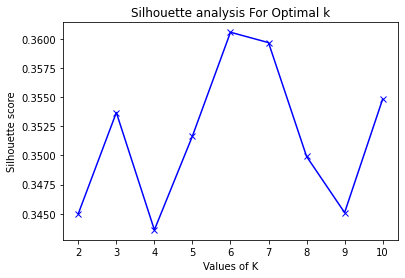

In [ ]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8,9,10]
silhouette_avg = []
for num_clusters in range_n_clusters:
 
 # initialise kmeans
  kmeans = KMeans(n_clusters=num_clusters)
  kmeans.fit(X_embedded)
  cluster_labels = kmeans.labels_
 # silhouette score
  silhouette_avg.append(silhouette_score(X_embedded, cluster_labels))

plt.plot(range_n_clusters,silhouette_avg,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Silhouette score') 
plt.title('Silhouette analysis For Optimal k')
plt.show()

In [ ]:
# Agglomerative Clustering
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 6, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X_embedded)

In [ ]:
# KMeans Clustering
k = 6
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(X_embedded)


In [ ]:
len(X_embedded)

28540

In [ ]:
sams['clusters'] = y_pred

In [ ]:
sams.loc[sams['clusters']==5]
#将这些clusters当作 tiam的 rating来进行 topic modelling，然后再在scatterplot中label上相应的名称即可

In [ ]:
cluster_1 = sams.loc[sams['clusters']==1]
cluster_2 = sams.loc[sams['clusters']==2]
cluster_3 = sams.loc[sams['clusters']==3]
cluster_4 = sams.loc[sams['clusters']==4]
cluster_5 = sams.loc[sams['clusters']==5]

cluster_0 = sams.loc[sams['clusters']==0]

In [ ]:
cluster_0

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


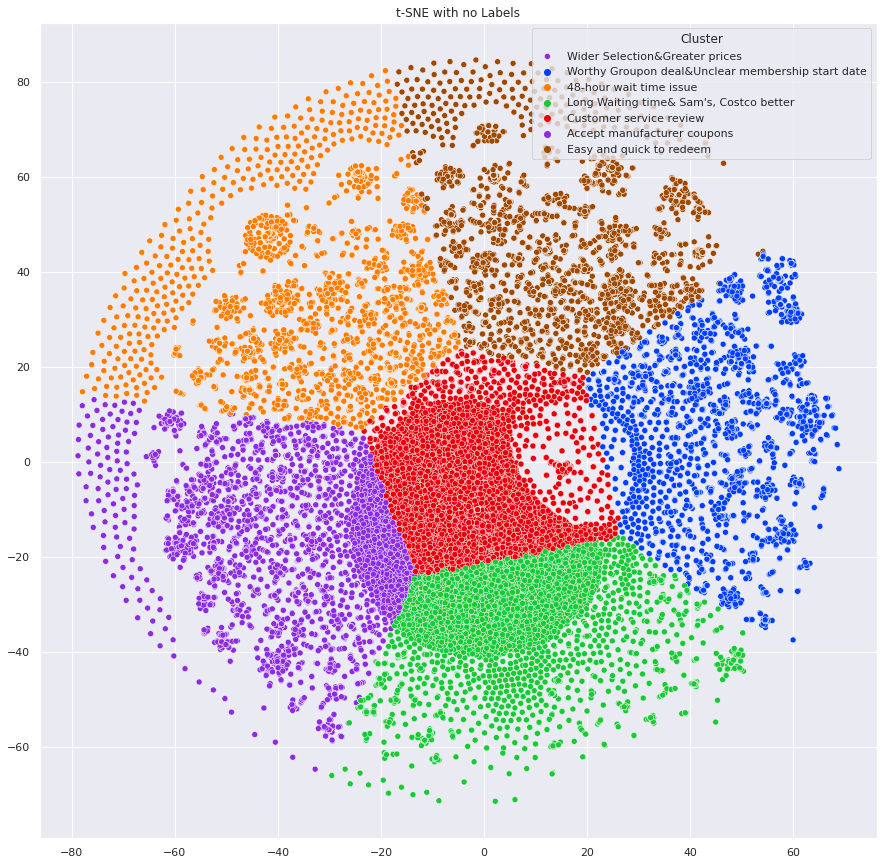

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns

# sns settings
sns.set(rc={'figure.figsize':(15,15)})

# plot
g = sns.scatterplot(X_embedded[:,0], X_embedded[:,1], hue = y_pred, palette= 'bright')

plt.legend(title='Cluster', loc='upper right', labels=['Good Products&Greater prices', 'Coupons are easy to redeem','Customer Service Reviews',"Didn't receive free gifts & cannot redeem coupons",'Received/ Not received gift cards','Store Clean and Organized'])


plt.title('t-SNE with no Labels')
plt.show(g)

# Topic Modelling

### Function

In [ ]:
def display_topics(model, feature_names, no_top_words):
    topic_dict = {}
    for topic_idx, topic in enumerate(model.components_):
        topic_dict["Topic %d words" % (topic_idx)]= ['{}'.format(feature_names[i])
                        for i in topic.argsort()[:-no_top_words - 1:-1]]
        topic_dict["Topic %d weights" % (topic_idx)]= ['{:.1f}'.format(topic[i])
                        for i in topic.argsort()[:-no_top_words - 1:-1]]
    return pd.DataFrame(topic_dict)

def ngrams_and_topic_modeling(df,cluster,return_tfidf = False):
    ''' Here we are going to make a function that print out the topics and the ngrams 
        of a given model based on 
    '''
    # Here we are going to be initializing the vectorizers 
    tfidf_ngram = TfidfVectorizer(max_features=50,ngram_range=(3,5),stop_words='english')
    tfidf_lda = TfidfVectorizer(max_features=50,stop_words='english')
    
    # Here we are going to be creating our df by review rating score 
    df_score = df.loc[df['clusters'] ==cluster,'without_stopwords']
    df_score_copy = df_score.copy(deep=True)
    
    df_score_transformed = tfidf_ngram.fit_transform(df_score)
    df_score_copy_transformed = tfidf_lda.fit_transform(df_score_copy)

    # getting ngrams and sorting in descending order
    tfidf_series = pd.Series(tfidf_ngram.vocabulary_)
    tfidf_series=tfidf_series.to_frame()
    tfidf_series['n-gram'] = tfidf_series.index
    tfidf_series.index = range(len(tfidf_series.index))
    tfidf_series.rename({0:'value_count'},axis=1,inplace=True)

    top_n_grams = tfidf_series.loc[~tfidf_series['n-gram'].str.contains('google')].sort_values('n-gram',ascending = False)
    print('done with ngrams')
    print('starting lda...')
    # Next we are going to do the Topic Modelling.
#     search_params = {'n_components': list(range(3,8)), 'learning_decay': [.5, .7, .9],'random_state':[23]}
    lda = LatentDirichletAllocation(n_components=3,learning_decay=.5,random_state=23)
#     grid = GridSearchCV(lda,param_grid=search_params,n_jobs=3)
    
    lda.fit(df_score_copy_transformed)
    
    tfidf_lda = pd.DataFrame(df_score_copy_transformed.toarray(),columns=tfidf_lda.get_feature_names())
    topics = display_topics(lda,tfidf_lda.columns,10)
    
    return top_n_grams , topics


def preprocessing_text(df):
    '''
    Here we are going to clean the text to be in a good format for further analysis 
    
    input: df ; DataFrame object that contains all of the reviews. 
    '''  
    lemm = WordNetLemmatizer()
    df = df.loc[~df.caption.isnull()] # here we are going to only process reviews 
    
    df.caption =  df.caption.apply(lambda review: clean_translated_reviews(review) if 'Google' in review else review)
        
    df.loc[:,'caption'] = df.loc[:,'caption'].apply(str.lower)
    df.loc[:,'caption'] = df.loc[:,'caption'].apply(lambda review: re.sub(r'[^\w\s]','',review)) # removes punctuation
    df.loc[:,'caption'] = df.loc[:,'caption'].apply(lambda review: re.sub('\([^()]*\)','',review)) # removes words within parenthesis 
    emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags=re.UNICODE)
    
    df.loc[:,'caption'] = df.loc[:,'caption'].apply(lambda review: emoji_pattern.sub(r'', review)) 
    df.loc[:,'caption_split'] = df.loc[:,'caption'].apply(lambda review: review.split(' '))
    
    clean_reviews = []
    for review_idx , review in df.caption_split.items():
        temp = []
        for idx, word in enumerate(review):
            if word in stop_words:
                continue
            else:
                temp.append(lemm.lemmatize(word))
        
        review_  = ' '.join(temp)
        clean_reviews.append(review_)
    
    df.loc[:,'caption'] = clean_reviews
    #df.drop(['Unnamed: 0'],axis=1,inplace=True)
    

    return df

## **Topic 1-7**

In [ ]:
sams.rename(columns={'text':'caption'},inplace=True)
#sams = preprocessing_text(sams)

#### **TOPIC 1**
1. Good product & Great prices
2. Sams is a great place to shop

**Sample reviews**
- "Great place to shop! They have good prices without the big crowds! Needless to say, I’m looking forward to using the scan and pay service." - Patricia
- "It was nice they lady help me start my membership Sam club has really good prices" --- Alnaysia

In [ ]:
ngrams_sams_0, topics_0 = ngrams_and_topic_modeling(sams, cluster = 0)
topics_0

done with ngrams
starting lda...


,Topic 0 words,Topic 0 weights,Topic 1 words,Topic 1 weights,Topic 2 words,Topic 2 weights
0,good,315.4,great,527.3,excellent,229.0
1,sam,196.7,place,252.6,service,203.7
2,love,178.0,prices,247.7,costco,173.4
3,club,143.2,shop,189.1,customer,138.5
4,store,134.6,products,137.2,selection,137.2
5,prices,133.8,sams,96.1,groupon,114.4
6,bulk,128.4,deals,88.8,deal,112.4
7,variety,98.0,like,84.6,better,85.0
8,items,87.0,membership,83.9,nice,82.7
9,buy,81.9,shopping,77.1,card,70.9


In [ ]:
ngrams_sams_0

,value_count,n-gram
12,49,store great prices
16,48,shopping sam club
4,47,shop sam club
47,46,sams club great
5,45,sam club membership
38,44,sam club great place shop
28,43,sam club great place
7,42,sam club great
31,41,products great prices
24,40,products good prices


#### **TOPIC 2**
1. Coupons are easy to redeem

**Example reviews:**
- "Great deal! Easy to redeem" - Michelle


In [ ]:
ngrams_sams_1, topics_1 = ngrams_and_topic_modeling(sams, cluster = 1)
topics_1

done with ngrams
starting lda...


,Topic 0 words,Topic 0 weights,Topic 1 words,Topic 1 weights,Topic 2 words,Topic 2 weights
0,easy,381.0,good,242.4,great,773.7
1,groupon,184.8,membership,230.3,deal,601.1
2,process,131.9,sam,168.0,redeem,172.6
3,service,128.0,club,153.0,love,96.7
4,use,126.7,price,127.4,super,79.1
5,quick,125.4,card,118.2,simple,51.8
6,worth,109.5,sams,88.7,money,49.6
7,buy,93.3,purchase,78.2,app,49.0
8,fast,83.0,groupon,77.4,easy,48.6
9,customer,82.6,help,76.6,smooth,47.6


In [ ]:
ngrams_sams_1

,value_count,n-gram
17,49,went sam club
39,48,went customer service
10,47,use sam club
41,46,super easy use
0,45,super easy redeem
13,44,shopping sam club
2,43,sams club membership
24,42,sam club membership
4,41,sam club groupon
3,40,sam club great


### **TOPIC 3**
1. Reviews related to Customer service
**Sample reviews**
- "This was the worst purchase I have ever bought from Groupon, I paid $35 for a plus membership and when I did the code for it , it only gave me the regular membership, I talk to Groupon and Groupon told me to talk to Sam’s I talk to Sam’s and they told me to talk to Groupon I got played around on this this was the worst experience ever people were rude at Groupon people are rude at Sams." --- Michelle
- "Great and easy with customer service" --- Guest


In [ ]:
ngrams_sams_2, topics_2 = ngrams_and_topic_modeling(sams, cluster = 2)
topics_2

done with ngrams
starting lda...


,Topic 0 words,Topic 0 weights,Topic 1 words,Topic 1 weights,Topic 2 words,Topic 2 weights
0,card,235.5,sam,327.0,service,265.3
1,sams,215.3,membership,256.0,customer,221.5
2,good,168.3,groupon,243.7,store,196.0
3,groupon,152.9,club,220.8,love,129.3
4,got,144.0,great,220.5,experience,113.4
5,voucher,142.4,deal,146.9,prices,112.8
6,gift,138.3,redeem,122.3,helpful,108.7
7,help,135.0,easy,110.4,costco,107.6
8,free,130.9,purchase,107.1,items,103.8
9,received,113.1,use,106.5,horrible,92.9


In [ ]:
ngrams_sams_2

,value_count,n-gram
14,49,young lady helped
43,48,worst customer service
32,47,work sam club
0,46,went sam club
8,45,use sam club
33,44,took long time
40,43,sure read fine print
39,42,sure read fine
24,41,shopping sam club
12,40,sams club membership


### **TOPIC 4**
1. Didn't receive free rotisserie chicken & fruit tray
2. Cannot redeem coupon

**Sample reviews**
- "Join and spent the required 25.00 dollar and in turn they were to send me a e-gift card but I never received the card or the free rotisserie chicken. I asked at the store and know one knows anything about it. Can't find the proper person to talk to to get the items they promised." --- Susan
- "The membership package is nice. The required activation and first purchase are also clear. However, there is no clearly stated requirements for the time limit on picking up the free gifts, (free pizza, cookies, rotisserie chicken and fruit tray). As a result, I missed 2 out of four free items, although I had gone in to make purchases at Sam's within the first three weeks. It would be nice if the timeline was clearly stated." --- Thipsukon
- "bought this stilll cant use went sams no one could help there is no where to contact anyone for help on group on i want my 25 dollar back never will i buy from groupon"
- "I went Sam’s to redeem my card. Groupon Never sent me my code. A wasted trip to Sam’s. There is no number to call Groupon."

In [ ]:
ngrams_sams_3, topics_3 = ngrams_and_topic_modeling(sams, cluster = 3)
topics_3

done with ngrams
starting lda...


,Topic 0 words,Topic 0 weights,Topic 1 words,Topic 1 weights,Topic 2 words,Topic 2 weights
0,groupon,709.8,sams,335.1,store,431.3
1,service,499.9,good,331.0,great,397.5
2,customer,435.7,items,317.2,time,289.6
3,card,429.2,membership,316.0,love,229.5
4,sam,398.1,free,306.0,easy,221.2
5,membership,302.8,club,281.2,shopping,195.3
6,club,284.5,like,281.0,experience,181.8
7,help,262.5,prices,242.3,money,176.0
8,redeem,253.8,helpful,241.0,staff,169.8
9,went,242.3,costco,237.9,process,168.2


In [ ]:
ngrams_sams_3

,value_count,n-gram
37,49,went sams club
14,48,went sam club
32,47,trying redeem groupon
33,46,store customer service
40,45,shopping sam club
43,44,service sam club
7,43,sams club membership
6,42,sams club groupon
30,41,sam customer service
13,40,sam club said


### **TOPIC 5**
1. Received/ Not received Gift card

**Sample reviews**
- "I love it and I upgraded to the plus membership for 20 dollar and got a 20-dollar gift card!"  --- Amber
- "Membership was a Groupon promo that included a $35 gift card that never was provided. Even when I asked about it at Sams. " --- PETER


In [ ]:
ngrams_sams_4, topics_4 = ngrams_and_topic_modeling(sams, cluster = 4)
topics_4

done with ngrams
starting lda...


,Topic 0 words,Topic 0 weights,Topic 1 words,Topic 1 weights,Topic 2 words,Topic 2 weights
0,groupon,278.0,card,367.7,club,170.3
1,redeem,238.8,gift,338.9,sam,146.3
2,code,204.4,received,240.5,card,130.7
3,voucher,182.1,free,186.4,sams,115.5
4,work,152.8,10,183.2,20,107.3
5,membership,152.4,great,175.4,good,104.6
6,service,147.3,receive,162.9,chicken,100.5
7,help,138.9,deal,155.0,coupons,88.1
8,use,129.4,membership,154.4,00,87.5
9,customer,125.4,got,144.1,30,83.4


In [ ]:
ngrams_sams_4

,value_count,n-gram
6,49,went sams club
9,48,went sam club
38,47,waiting gift card
2,46,sams club membership
0,45,sam club membership
10,44,sam club groupon
14,43,sam club great
4,42,sam club card
7,41,redemption code work
35,40,received gift cards


### **TOPIC 6**
1. store clean stocked
2. love shopping Sams club

**Sample Reviews**
- "Good experience. Customer service rep was very patient. Store was clean and well set up." --- Fran
- "I love shopping at sams club there always very well stocked great prices." --- Deborah

In [ ]:
ngrams_sams_5, topics_5 = ngrams_and_topic_modeling(sams, cluster = 5)
topics_5

done with ngrams
starting lda...


,Topic 0 words,Topic 0 weights,Topic 1 words,Topic 1 weights,Topic 2 words,Topic 2 weights
0,good,354.1,awesome,238.5,service,390.8
1,helpful,260.6,deals,193.7,customer,296.9
2,friendly,221.0,deal,155.9,great,232.6
3,club,203.8,groupon,152.9,store,206.3
4,sam,192.8,great,136.7,love,204.6
5,love,190.0,membership,115.3,nice,196.2
6,experience,180.7,easy,103.5,clean,88.0
7,staff,172.8,savings,68.9,people,78.4
8,great,158.4,card,60.6,best,77.2
9,sams,149.4,offer,58.1,helpful,75.5


In [ ]:
ngrams_sams_5

,value_count,n-gram
44,49,store clean stocked
45,48,store clean organized
19,47,staff helpful friendly
22,46,staff friendly helpful
10,45,shopping sams club
39,44,shopping sam club
33,43,service desk helpful
37,42,sams club membership
41,41,sams club great
26,40,sams club good
